In [18]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import math
from matplotlib import style
style.use('dark_background')
style.use('bmh')

In [19]:
def gen_oracle(function, num_qubits):
    qc = QuantumCircuit(num_qubits+1)
    if function == 'constant':
        qc.x(num_qubits)
    else:
        qc.cx(range(num_qubits), num_qubits)
    display(qc.draw('mpl'))
    gate = qc.to_gate()
    gate.name = 'oracle'
    return gate  

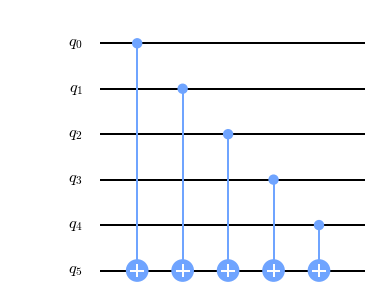

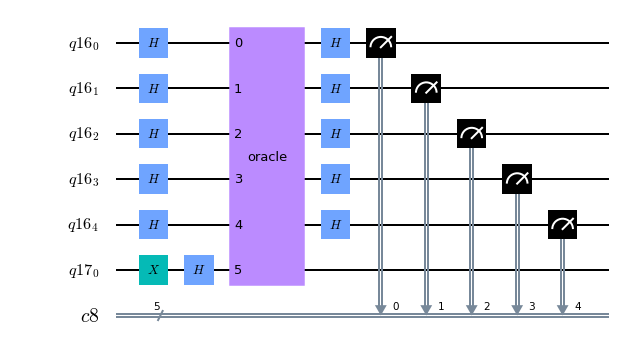

In [20]:
num_qubits = 5
function = 'balanced'

qr = QuantumRegister(num_qubits)
ancillia = QuantumRegister(1)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr, ancillia, cr)
qc.x(ancillia)
qc.h(qr)
qc.h(ancillia)

oracle = gen_oracle(function, num_qubits)
qc.append(oracle, range(num_qubits+1))

qc.h(qr)
qc.measure(qr, cr)
qc.draw('mpl')

In [21]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, sim).result()

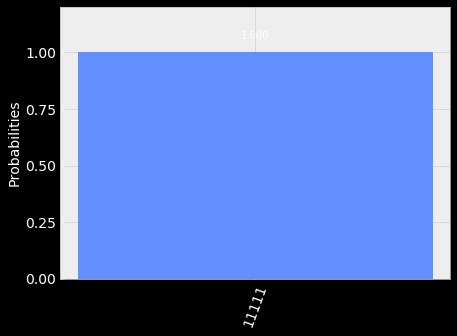

In [22]:
plot_histogram(result.get_counts(qc))